# Visualizing with SOM
Visualize the MNIST-784 handwritten digits dataset with SOM and discuss what you can learn from the visualization.

In [1]:
# Imports

import numpy as np
import pandas as pd
from scipy.io import arff
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## Dataset
The MNIST dataset is a benchmark collection of handwritten digits created by Yann LeCun, Corinna Cortes, and Christopher J.C. Burges. It contains a total of 70,000 grayscale images of digits from 0 to 9, each represented as a 28×28 pixel grid (784 features). The images were originally derived from the NIST Special Database 1 and 3, combining samples from different groups of writers to ensure diversity and to avoid bias between training and testing sets.

All digits were size-normalized to fit within a 20×20 pixel box while preserving their aspect ratio, then centered within a 28×28 field according to the center of mass of their pixels. The images contain varying grayscale levels due to the anti-aliasing used during normalization. The dataset is balanced and widely used to evaluate classification and dimensionality reduction methods because it captures natural variations in handwriting style across approximately 250 writers.

In [ ]:
# Load MNIST dataset (unzip file first)

data, meta = arff.loadarff('mnist_784.arff')
df = pd.DataFrame(data)

X = df.drop('class', axis=1).values
y = df['class'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

"unzip" non � riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.


NameError: name 'arff' is not defined

## Self-Organizing Maps (SOM)
In this work, the MNIST dataset is employed to visualize high-dimensional image data using Self-Organizing Maps (SOM), highlighting how similar digits cluster in the lower-dimensional representation space.

SOM is an unsupervised neural network implementing competitive learning, while integrating also clustering of data. It is often used for visualization purposes since the neighbouring representatives on the map lie also close in the pattern space and the typical dimensionality of the resulting map is two-dimensional.

In [ ]:
# SOM

som_size = 20
som = MiniSom(x=som_size, y=som_size, input_len=X_scaled.shape[1],
              sigma=1.5, learning_rate=0.5, neighborhood_function='gaussian', random_seed=10)

som.random_weights_init(X_scaled)
som.train_random(X_scaled, 1000, verbose=True)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 5.340762704311363


The quantization error of approximately 5.34 indicates a moderate average distance between the input samples and their corresponding best-matching neurons, which is acceptable for high-dimensional data.

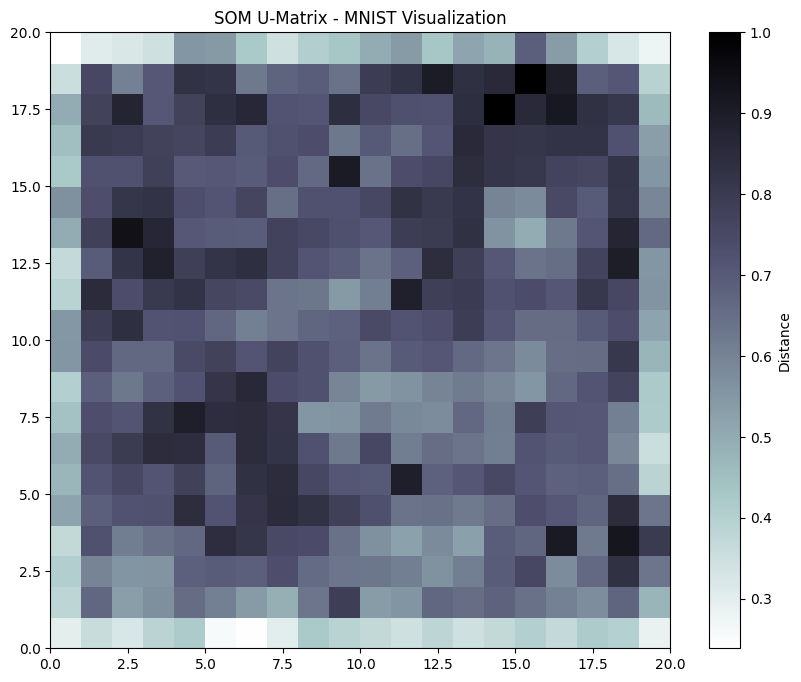

SOM U-Matrix


In [ ]:
# U-Matrix

plt.figure(figsize=(10, 8))
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar(label='Distance')
plt.title('SOM U-Matrix - MNIST Visualization')
plt.show()
print("SOM U-Matrix")

The U-Matrix visualizes the distances between neighboring neurons in the Self-Organizing Map. Lighter areas indicate smaller distances, meaning neurons in those regions represent similar input vectors, while darker regions correspond to higher distances, forming natural cluster boundaries. In this case, the U-Matrix shows a structured topology where regions of low distance suggest coherent groups of similar digits, and darker separations mark transitions between different digit clusters. This indicates that the SOM has successfully captured the intrinsic structure of the MNIST feature space.

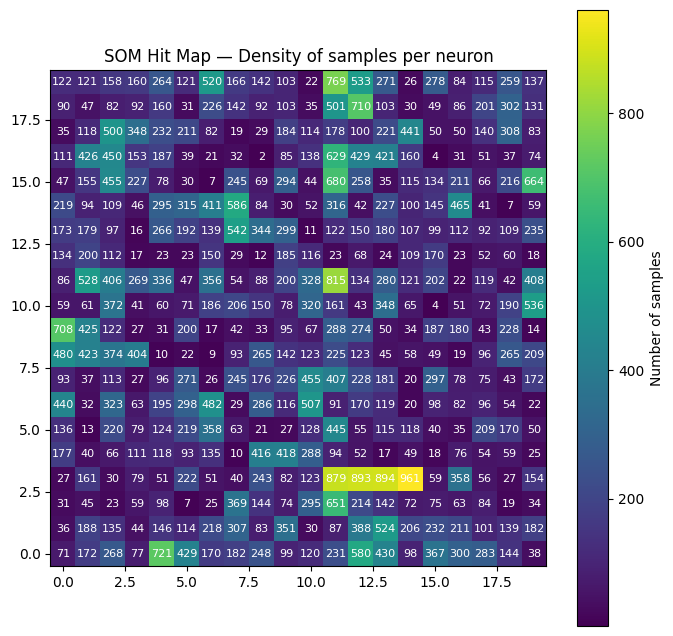

SOM Hits map


In [ ]:
# Hits map

nx, ny, _ = som.get_weights().shape
hits = np.zeros((nx, ny))
for x in X_scaled:
    w = som.winner(x)
    hits[w] += 1

plt.figure(figsize=(8, 8))
plt.imshow(hits.T, origin='lower', cmap='viridis')
plt.colorbar(label='Number of samples')
plt.title('SOM Hit Map — Density of samples per neuron')

for i in range(nx):
    for j in range(ny):
        if hits[i, j] > 0:
            plt.text(i, j, int(hits[i, j]), ha='center', va='center',
                     color='white', fontsize=8)

plt.show()
print("SOM Hits map")

The Hit Map displays the number of samples mapped to each neuron (Best Matching Unit). Brighter or yellow cells correspond to neurons that have been selected as BMUs for many samples, whereas darker or purple cells represent less frequently activated neurons. The uneven distribution of activations demonstrates that some neurons specialize in representing highly common digit patterns, while others correspond to less frequent or ambiguous shapes.

## References
Y. LeCun, C. Cortes, and C.J.C. Burges, The MNIST database of handwritten digits, http://yann.lecun.com/exdb/mnist/